<center><h1> <font color='green'>DESAFIO : -Variable Aleatoria 1</font></h1></center>
<center><h1> <font color='yellow'>Vinka Arias Barrios</font></h1></center>

In [2]:
# importamos la triada de Data Science
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# importamos scipy.stats que ayudará a generar distribuciones
from scipy.stats import norm


In [3]:
## Leer archivo csv 
dataset = pd.read_csv("baby.csv")


<left><h2> <font color='yellow'> 1. Realiza una exploración de los datos, considerando sus tipos y los descriptivos
correspondientes.
 </font><leftr>

In [8]:
#para investigar el archivo un poco sobre la cantidade de filas y columnas
dataset.shape


(1174, 7)

In [10]:
dataset.describe()
#Describe nos corrobora quue no hay valores sin datos el count es = 1174 tal como arrojo shape


,Unnamed: 0,Birth.Weight,Gestational.Days,Maternal.Age,Maternal.Height,Maternal.Pregnancy.Weight
count,1174.000000,1174.000000,1174.000000,1174.000000,1174.000000,1174.000000
mean,587.500000,119.462521,279.101363,27.228279,64.049404,128.478705
std,339.048915,18.328671,16.010305,5.817839,2.526102,20.734282
min,1.000000,55.000000,148.000000,15.000000,53.000000,87.000000
25%,294.250000,108.000000,272.000000,23.000000,62.000000,114.250000
50%,587.500000,120.000000,280.000000,26.000000,64.000000,125.000000
75%,880.750000,131.000000,288.000000,31.000000,66.000000,139.000000
max,1174.000000,176.000000,353.000000,45.000000,72.000000,250.000000


In [12]:
#Para revisar los tipos de datos de las columnas e inverstigar si hay datos nulos
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1174 entries, 0 to 1173
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   Unnamed: 0                 1174 non-null   int64
 1   Birth.Weight               1174 non-null   int64
 2   Gestational.Days           1174 non-null   int64
 3   Maternal.Age               1174 non-null   int64
 4   Maternal.Height            1174 non-null   int64
 5   Maternal.Pregnancy.Weight  1174 non-null   int64
 6   Maternal.Smoker            1174 non-null   bool 
dtypes: bool(1), int64(6)
memory usage: 56.3 KB


<left><h2> <font color='yellow'>
2. Considera los pesos de los bebés. ¿Se puede decir que siguen una distribución
normal? Justifica tu respuesta creando los gráficos y modelos necesarios.
 </font><left>

In [15]:
#asignamos a la variable pesos la columna 'Birth.Wight' aporvecho de borrar valores nulos por si acaso hubieran
pesos=dataset['Birth.Weight'].dropna()

#necesito el campo peso en unidad de medida pesos para mejor interpretacion (personal) : pesos asumo que está en ONZAS
dataset['Birth.Weight.kilos'] = dataset['Birth.Weight'] / 35.274


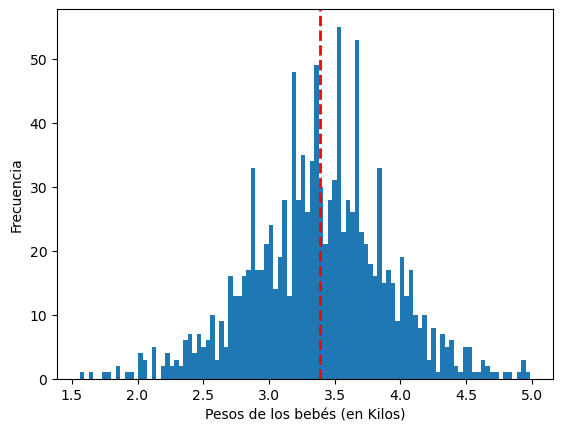

In [17]:
#asignamos a la variable pesos la columna 'Birth.Wight.pesos' convertida a Kilos 
pesos=dataset['Birth.Weight.kilos']
media=np.mean(pesos) #obtengo el promedio de los pesos 
plt.hist(pesos, bins=100) ## indico que divida el eje x en 100 intervalos
plt.axvline(x=media, color='red', linestyle='dashed', linewidth=2, label='Media') #columna vertical
plt.xlabel('Pesos de los bebés (en Kilos)') #etiqueta eje x
plt.ylabel('Frecuencia') #etiqueta eje y
plt.show()

## El histograma con los datos nos dice lo siguiente: El comportamiento de la variable pesos de los bebés, no sigue una distribucion normal porque la mayor cantidad no está en la media, podemos observar casos con un peso mayor a la media (3,5 kg) en la cola derecha.

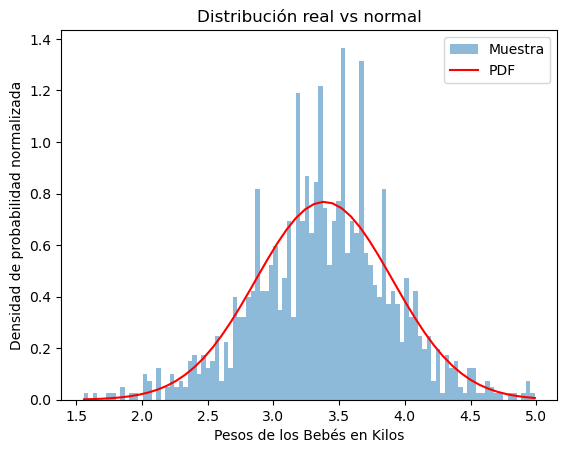

In [20]:
#Veremos ahora como un modelo de distribucion normal puede ayudarnos a modelar esta situación
#Calculamos la media y la desviación estándar de los datos, además de los valores máximo y mínimo para graficar.
mu    = pesos.mean()
sigma = pesos.std()
minimo= pesos.min()
maximo= pesos.max()

#Creamos un arreglo de valores equidistantes entre los valores mínimo y máximo, utilizando linspace
x = np.linspace(minimo, maximo)

#Creamos una función, llamada pdf, que calcula el valor de la función de distribución de probabilidad normal, con los parámetros dados
# Notemos que "sigma" funciona como "escala"
pdf = norm.pdf(x, loc=mu, scale=sigma)


# Histograma de los datos. El parámetro "density=True" va a construir el histograma haciendo que la suma de todas 
#las áreas de las barras sea igual a 1, para que podamos representar las probabilidades

plt.hist(pesos, bins=100, density=True, alpha=0.5, label='Muestra')#alpha=0.5 da un 50% de transparencia

plt.plot(x, pdf, color='red', label='PDF') #Graficamos la distribución normal

plt.xlabel('Pesos de los Bebés en Kilos')
plt.ylabel('Densidad de probabilidad normalizada')
plt.title('Distribución real vs normal')
plt.legend()
plt.show()

## EL gráfico muestra ahora la distribucion normal donde la media está en el centro.

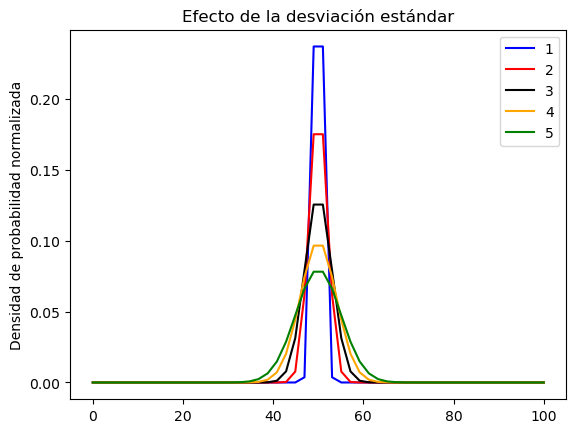

In [23]:
x = np.linspace(0, 100)# consideraremos un rango de valores entre 0 y 100

desv={1:'blue',2:'red',3:'black',4:'orange',5:'green'}

for clave,valor in desv.items():
  pdf = norm.pdf(x, loc=50, scale=clave)
  plt.plot(x, pdf, color=valor, label=clave)

plt.ylabel('Densidad de probabilidad normalizada')
plt.title('Efecto de la desviación estándar')
plt.legend()
plt.show()

## ¿Que tan  dispersos están los datos? A menor desviacion estandard aumenta muy poco la dispersion de los datos, a mayor desviacion aumenta un poco mas la dispersion. 

<left><h2> <font color='yellow'>
3. Considerando lo anterior, verifica el modelo de distribución normal de los pesos para 5 valores diferentes. Compara con los datos reales. </font><left>

In [27]:

from scipy.stats import percentileofscore
pesos_prueba = [1,2,3,4,5]

for i in pesos_prueba:
  p_real=round(percentileofscore(pesos,i),2)

  p_modelo=round(100*norm.cdf(i, loc=mu, scale=sigma),2)

  print(f'El percentil real para {i} kilos es {p_real}, y el teórico es {p_modelo} kilos')


El percentil real para 1 kilos es 0.0, y el teórico es 0.0 kilos
El percentil real para 2 kilos es 0.68, y el teórico es 0.38 kilos
El percentil real para 3 kilos es 21.98, y el teórico es 22.84 kilos
El percentil real para 4 kilos es 89.27, y el teórico es 88.11 kilos
El percentil real para 5 kilos es 100.0, y el teórico es 99.9 kilos


<left><h2> <font color='yellow'>
4. Compara los pesos de los bebés de madres fumadoras y no fumadoras  ¿Qué diferencias existen? Explica y construye los modelos correspondntes
</font><left>

In [34]:
# Definir el tamaño del dataset
total = len(dataset)

# Generar una nueva columna 'Smoker' con 71% fumadores (1) y 39% no fumadores (0)
dataset['Maternal.Smoker'] = np.random.choice([True, False], size=total, p=[0.61, 0.39])


# Ver las primeras filas para verificar el resultado
dataset.head()

,Unnamed: 0,Birth.Weight,Gestational.Days,Maternal.Age,Maternal.Height,Maternal.Pregnancy.Weight,Maternal.Smoker,Birth.Weight.kilos
0,1,120,284,27,62,100,False,3.401939
1,2,113,282,33,64,135,False,3.203493
2,3,128,279,28,64,115,True,3.628735
3,4,108,282,23,67,125,True,3.061745
4,5,136,286,25,62,93,False,3.855531


In [39]:
dataset['Maternal.Smoker'].value_counts()

Maternal.Smoker
True     718
False    456
Name: count, dtype: int64

In [41]:
Fumadoras   = dataset[dataset['Maternal.Smoker']==1]['Birth.Weight.kilos']
NoFumadoras = dataset[dataset['Maternal.Smoker']==0]['Birth.Weight.kilos']


In [47]:
# Definiremos ahora una función que nos permita modelar un conjunto de datos con a distribución normal
def get_psd(x):
  mu=x.mean()
  sigma=x.std()
  minimo=x.min()
  maximo=x.max()
  x = np.linspace(minimo, maximo)
  pdf = norm.pdf(x, loc=mu, scale=sigma)
  return(x,pdf)

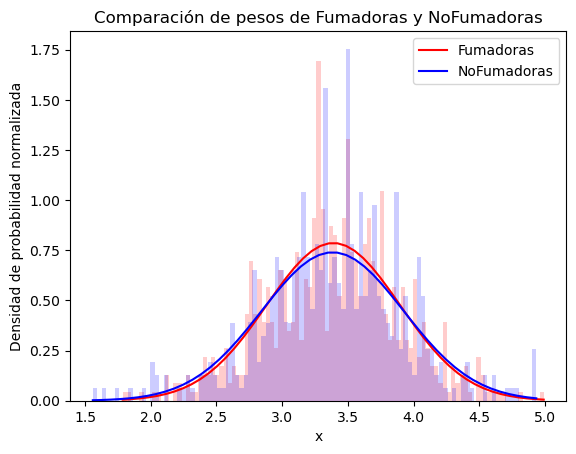

In [49]:
x,pdf=get_psd(Fumadoras)
plt.plot(x , pdf, color='red', label='Fumadoras')

x,pdf=get_psd(NoFumadoras)
plt.plot(x , pdf, color='blue', label='NoFumadoras')

plt.hist(Fumadoras, bins=100, density=True, alpha=0.2, color='red')
plt.hist(NoFumadoras, bins=100, density=True, alpha=0.2, color='blue')

plt.xlabel('x')
plt.ylabel('Densidad de probabilidad normalizada')
plt.title('Comparación de pesos de Fumadoras y NoFumadoras')
plt.legend()
plt.show()

El grafico nos indica que:
- los pesos de los bebes cercanos a la media corresponden en su mayoria a madres Fumadoras, seguidos por una diferencia menor a madres no Fumadoras.
- los bebes con peso menor corresponden a madres no fumadoras( valores en las colas derecha)
- los bebes con peso mayor corresponden a madres no fumadoras( valores en las colas izquierda) 

<left><h2> <font color='yellow'>
5. Considerando los datos dados:
## ● Calcula la probabilidad de que una madre escogida al azar fume. </font><left>

In [57]:

mu = np.mean(Fumadoras)
sigma = np.std(Fumadoras)

# Valor específico para el cual queremos calcular la probabilidad
valor = 1

# Calcular la probabilidad acumulada
probabilidad = norm.cdf(valor, loc=mu, scale=sigma)

print("La probabilidad de que una madre al azar fume es igual a", valor, "es:", probabilidad)

La probabilidad de que una madre al azar fume es igual a 1 es: 1.2217063192436484e-06


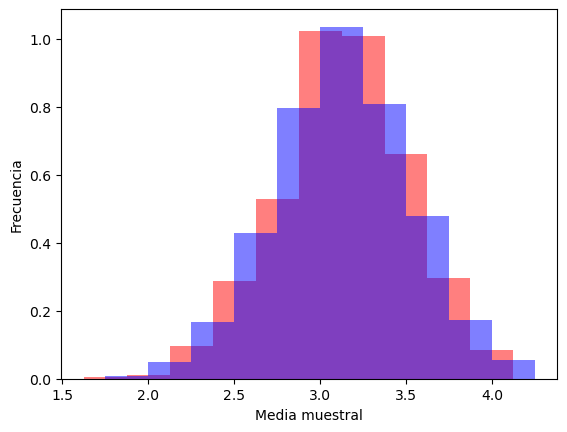

In [59]:
#Seleccionamos los datos y cambiamos los True por 1 y False por cero. Con esto calculamos la probabilidad

datos = dataset['Maternal.Smoker'].dropna()
fuma = np.where(datos, 1, 0)
p=sum(fuma)/len(fuma)


#Generamos las muestras "teoricas" con la distribución binomial, y almacenamos las medias muestrales
medias_binom=[]
for j in range(1000):
  medias_binom.append(np.mean(np.random.binomial(5,p,size=8)))

#escogemos ahora las 1000 muestras de tamaño 8 a partir de los datos reales, y hacemos lo mismo
medias=[]
for k in range(1000):
  muestra=[]
  for t in range(8):
    muestra.append(sum(np.random.choice(fuma,size=5,replace=False)))
  medias.append(np.mean(muestra))

plt.hist(medias_binom, bins=10,density=True,alpha=0.5, color='red', label='Binomial')
plt.hist(medias, bins=10,density=True,alpha=0.5,color='blue', label='Real')

plt.xlabel('Media muestral')
plt.ylabel('Frecuencia')
plt.show()


<left><h2> <font color='yellow'>
## ● A partir del valor anterior, construye un modelo de distribución binomial que modele el experimento correspondiente a escoger 5 madres al azar y        observar cuántas fuman.</font><left>

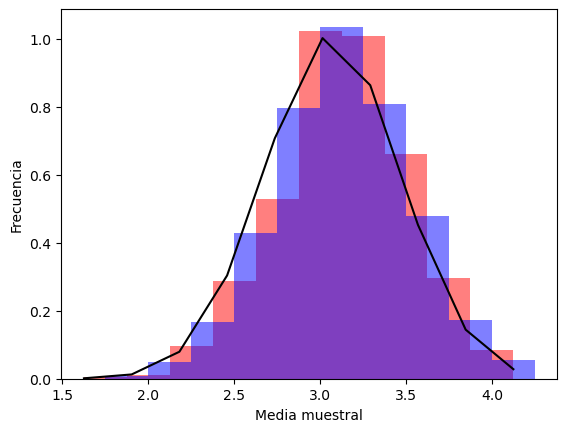

In [62]:
#Vimos que la probabilidad es p. Calculamos la media y desviación teóricas
mu=np.mean(medias)
desv=np.std(medias)
minimo=np.min(medias_binom)
maximo=np.max(medias_binom)
x = np.linspace(minimo, maximo,num=10)
pdf = norm.pdf(x, loc=mu, scale=desv)
a=np.std(medias)
b=np.std(medias_binom)
plt.hist(medias_binom, bins=10,density=True,alpha=0.5, color='red', label='Binomial')
plt.hist(medias, bins=10,density=True,alpha=0.5,color='blue', label='Real')
plt.plot(x, pdf, color='black', label='Dist. Normal')
plt.xlabel('Media muestral')
plt.ylabel('Frecuencia')
plt.show()

<left><h2> <font color='yellow'>
## ● Utilizando este modelo, simula 1000 muestras de tamaño 8, y calcula sus medias muestrales..</font><left>

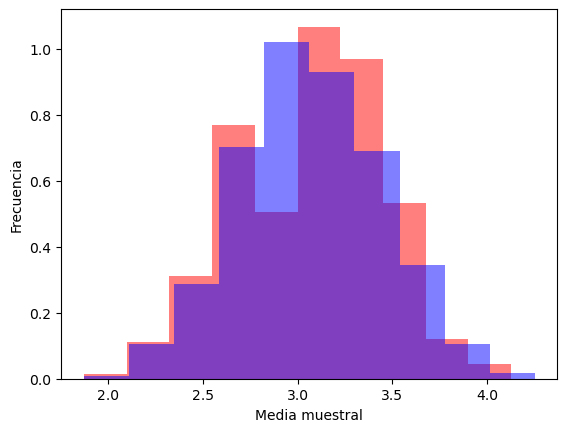

In [65]:
#Seleccionamos los datos y cambiamos los True por 1 y False por cero. Con esto calculamos la probabilidad

datos = dataset['Maternal.Smoker'].dropna()
fuma = np.where(datos, 1, 0)
p=sum(fuma)/len(fuma)


#Generamos las muestras "teoricas" con la distribución binomial, y almacenamos las medias muestrales
medias_binom=[]
for j in range(1000):
  medias_binom.append(np.mean(np.random.binomial(5,p,size=8)))

#escogemos ahora las 1000 muestras de tamaño 8 a partir de los datos reales, y hacemos lo mismo
medias=[]
for k in range(1000):
  muestra=[]
  for t in range(8):
    muestra.append(sum(np.random.choice(fuma,size=5,replace=False)))
  medias.append(np.mean(muestra))

plt.hist(medias_binom, bins=10,density=True,alpha=0.5, color='red', label='Binomial')
plt.hist(medias, bins=10,density=True,alpha=0.5,color='blue', label='Real')

plt.xlabel('Media muestral')
plt.ylabel('Frecuencia')
plt.show()





<left><h2> <font color='yellow'>
## ● Utilizando los datos directamente, extrae 1000 muestras de tamaño 8 y calcula sus respectivas medias muestrales.</font><left>

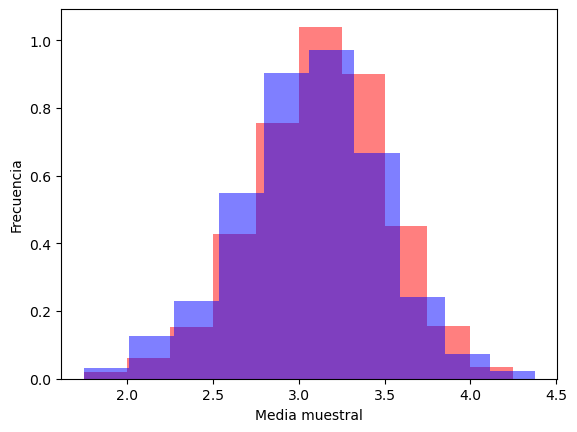

In [68]:
#Seleccionamos los datos y cambiamos los True por 1 y False por cero. Con esto calculamos la probabilidad

datos = dataset['Maternal.Smoker'].dropna()
fuma = np.where(datos, 1, 0)
p=sum(fuma)/len(fuma)


#Generamos las muestras "teoricas" con la distribución binomial, y almacenamos las medias muestrales
medias_binom=[]
for j in range(1000):
  medias_binom.append(np.mean(np.random.binomial(5,p,size=8)))

#escogemos ahora las 1000 muestras de tamaño 8 a partir de los datos reales, y hacemos lo mismo
medias=[]
for k in range(1000):
  muestra=[]
  for t in range(8):
    muestra.append(sum(np.random.choice(fuma,size=5,replace=False)))
  medias.append(np.mean(muestra))

plt.hist(medias_binom, bins=10,density=True,alpha=0.5, color='red', label='Binomial')
plt.hist(medias, bins=10,density=True,alpha=0.5,color='blue', label='Real')

plt.xlabel('Media muestral')
plt.ylabel('Frecuencia')
plt.show()

